Seeing if I need all the imports and downloads 

In [2]:
import re 
import ssl
import nltk 
import string 
import warnings 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to /Users/sam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Is the code below needed? 

In [3]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Exploratory Data Analysis (EDA)

In [5]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [6]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
#Remove unneccessary coloumn from train data set 
train = train.drop(columns = 'id')
train.head()


,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [8]:
#Count number of words in Train data set 
word_count = 0
for x in train['text']:
    x = x.split()
    for y in x:
        word_count += 1
print("Number of words in Train Dataset:", word_count)

Number of words in Train Dataset: 113461


Number of non-disaster tweets vs disaster tweets in Train Dataset:
0    4342
1    3271
Name: target, dtype: int64


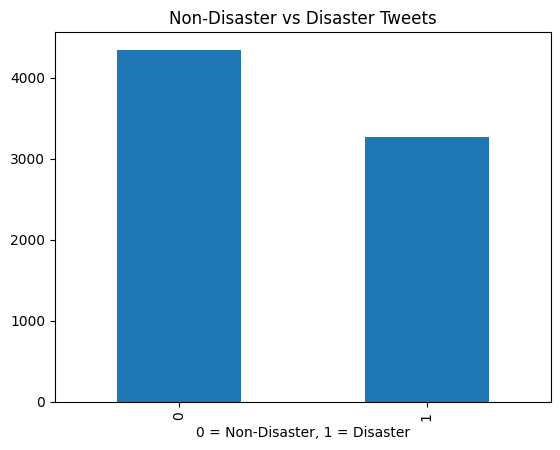

In [9]:
print("Number of non-disaster tweets vs disaster tweets in Train Dataset:")
print(train.target.value_counts())

ax = train['target'].value_counts().sort_index()\
    .plot(
        kind = 'bar',
        title = 'Non-Disaster vs Disaster Tweets'
    )

ax.set_xlabel("0 = Non-Disaster, 1 = Disaster")
plt.show()

Cleaning tweets

In [10]:
train['text'] = train['text'].str.replace('(http\S*)|(#)|(@)|([R][T]\s)|([^a-zA-Z0-9\s])', '', regex=True) 
#for x in train['text']:
#    print(x)
train['text'] = train['text'].str.replace('\s+', ' ', regex=True).str.lower()

cleaned_word_count = 0
for x in train['text']:
    x = x.split()
    for y in x:
        cleaned_word_count += 1

print("Number of words in Train Dataset before cleaning:", word_count)
print("Number of words in Train Dataset after cleaning:", cleaned_word_count)
print("Difference:", word_count - cleaned_word_count)


Number of words in Train Dataset before cleaning: 113461
Number of words in Train Dataset after cleaning: 106502
Difference: 6959


Finding most common words in non-disaster and disaster tweets 

Tokenizing

In [11]:
token = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: token.tokenize(x))

In [12]:
display(train.head())

,keyword,location,text,target
0,NaN,NaN,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]",1
1,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,NaN,NaN,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, evacuation, or, shelter, in, place, orders, are, expected]",1
3,NaN,NaN,"[13000, people, receive, wildfires, evacuation, orders, in, california]",1
4,NaN,NaN,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, school]",1


In [13]:
lemmatizer = nltk.WordNetLemmatizer()
train['text'] = train['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [14]:
display(train.head())

,keyword,location,text,target
0,NaN,NaN,"[our, deed, are, the, reason, of, this, earthquake, may, allah, forgive, u, all]",1
1,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,NaN,NaN,"[all, resident, asked, to, shelter, in, place, are, being, notified, by, officer, no, other, evacuation, or, shelter, in, place, order, are, expected]",1
3,NaN,NaN,"[13000, people, receive, wildfire, evacuation, order, in, california]",1
4,NaN,NaN,"[just, got, sent, this, photo, from, ruby, alaska, a, smoke, from, wildfire, pours, into, a, school]",1


In [15]:
wc = 0
for x in train['text']:
    for y in x:
        wc += 1

print(wc)

106502


Remove stop words

In [16]:
",".join(stopwords.words('english'))
stops_words = set(stopwords.words('english'))
train['text'] = train['text'].apply(lambda x: [item for item in x if item not in stops_words])


In [17]:
display(train.head())

,keyword,location,text,target
0,NaN,NaN,"[deed, reason, earthquake, may, allah, forgive, u]",1
1,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,NaN,NaN,"[resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]",1
3,NaN,NaN,"[13000, people, receive, wildfire, evacuation, order, california]",1
4,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfire, pours, school]",1


In [18]:
wc = 0
for x in train['text']:
    for y in x:
        wc += 1

print(wc)

71771


In [19]:
train['text'] = train['text'].apply(lambda x: ' '.join(x))

Vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bowt = CountVectorizer(analyzer=train['text'])
bowt.fit(train['text'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

https://github.com/deepaliattavar/DISASTER-TWEET-ANALYSIS/blob/main/Aiwir_assignment.ipynb
https://github.com/robertdosa/Disaster-or-not-/blob/master/NL_Data_preprocessing%20and%20classification%20with%20Naive-Bayes%20classifier.ipynb